In [1]:
import numpy as np
import cvxpy as cvx
from imTools import *
from Taylor08 import *

In [2]:
# target = readImage('images/BrainProtonDensitySliceShifted13x17y.png', (100,100))
# base = readImage('images/BrainT1Slice.png', (100,100))
target = readImage('images/BrainProtonDensitySliceShifted13x17y.png', (75,75))
base = readImage('images/BrainProtonDensitySlice.png', (75,75))
(m, n, _) = base.shape

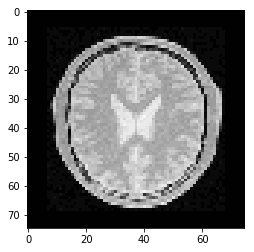

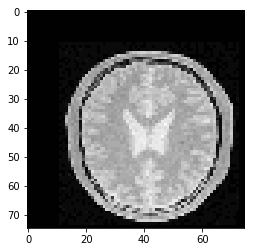

In [3]:
plt.imshow(base)
plt.show()
plt.imshow(target)

In [4]:
p = Taylor08(target, base, 'firstOrder')

Getting Coefficients...
Done. Time elapsed: 4.309751987457275  


Formatting Matrices...
Done. Total Time Elapsed:  4.5770790576934814 




/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/usr/local/lib/python3.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:203: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


Current gap: 42918.0 


Current gap: 1430.6 


Current gap: 47.68666666666667 


Current gap: 1.5895555555555556 


Current gap: 0.052985185185185184 




[ 0.0242099   0.01154479 -0.00107059 -0.04788739 -0.00072244  0.01324023]


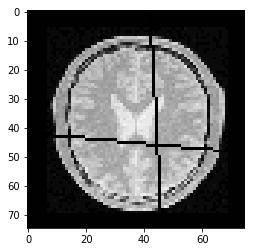

In [5]:
print(p)
plt.imshow(firstOrderDeformImage(base, p[:3], p[3:]))

In [73]:
(M, N, _) = base.shape

(Ax, Ay, Iz, b, C) = getConstraintCoeffs(target, base, 3, 'firstOrder')
z = cvx.Variable(M*N)
px = cvx.Variable(3)
py = cvx.Variable(3)

objective = cvx.Minimize(np.ones(M*N).T @ z)
# constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0, C @ px <= 40 * np.ones(M*N), C @ px >= 1 * np.ones(M*N), C @ py <= 40 * np.ones(M*N), C @ py >= 1 * np.ones(M*N)]
constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0]

prob = cvx.Problem(objective, constraints)

result = prob.solve(solver=cvx.ECOS)

Getting Coefficients...
Done. Time elapsed: 4.161452770233154  


Formatting Matrices...
Done. Total Time Elapsed:  4.436770915985107 




In [74]:
px.value

array([ 0.02444351,  0.01154246, -0.00107197])

In [75]:
py.value

array([-0.04765283, -0.00072242,  0.01323528])

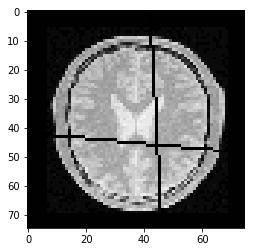

In [9]:
plt.imshow(firstOrderDeformImage(base, px.value, py.value))

In [72]:
px.value

array([0.50018993])

In [66]:
(Ax, Ay, Iz, b, C) = getConstraintCoeffs(target, base, 10, 'firstOrder')

Getting Coefficients...
Done. Time elapsed: 28.67722201347351  


Formatting Matrices...
Done. Total Time Elapsed:  29.395843029022217 




In [67]:
z = cvx.Variable(M*N)
px = cvx.Variable(1)
py = cvx.Variable(1)

objective = cvx.Minimize(np.ones(M*N).T @ z)
# constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0, C @ px <= 40 * np.ones(M*N), C @ px >= 1 * np.ones(M*N), C @ py <= 40 * np.ones(M*N), C @ py >= 1 * np.ones(M*N)]
# constraints = [Ax @ C @ px + Ay @ C @ py - Iz @ z - b <=0]
constraints = [Ax @ np.ones(M*N) *px + Ay @ np.ones(M*N)*py - Iz @ z - b <=0]

prob = cvx.Problem(objective, constraints)

result = prob.solve(solver=cvx.ECOS)

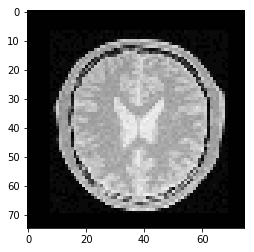

In [68]:
plt.imshow(firstOrderDeformImage(base, [px.value, 0, 0], [py.value, 0, 0]))

In [70]:
py.value

array([0.58648549])

In [49]:
C.shape

(5625, 3)

In [50]:
M*N

5625

In [52]:
Iz.shape

(76285, 5625)

In [53]:
z

Variable((5625,))

In [54]:
Ax.shape

(76285, 5625)